---
<h1 align='center' style="color:green">Extreme Gradient Boosting</h1>

---
<h1 align='center' style="color:green">Power Plant output</h1>

---

### xtreme Gradient Boosting is amongst the excited Python libraries in machine learning these times.

### here we will elaborate on how to conduct an analysis in Python. Extreme Gradient Boosting supports various objective functions, including regression, classification, and ranking.

---
## 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---
## 2. Read the Power Plant data

In [4]:
data=pd.read_excel("data/Folds5x2_pp.xlsx")

### > Apply descriptive statitcis to know more about data

In [5]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

### The columns in the DataFrame are:
>- AT = Atmospheric Temperature in C
>- V = Exhaust Vacuum Speed
>- AP = Atmospheric Pressure
>- RH = Relative Humidity
>- PE = Power Output

### Power Output is the value we are trying to predict given the measurements above.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


---
## 3. Create Training and Test datasets

### We predict for "Power Output" So this is our target and other columns are features

In [12]:
# select feature so neglect "Power output" column
X=data.drop("PE",axis=1)

# select target column
y=data['PE'].values  # we got vector
# convert vector into array
y=y.reshape(-1,1)

---
## 4. Split data into Train & Test dataset

In [17]:
from sklearn.model_selection import train_test_split
# split data into Train 80% and Test 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### > shape of the data

In [21]:
print("total data shape : ",data.shape)
# 80% train data
print("Train data shape : ",X_train.shape)
# 20% test data
print("Test data shape  : ",X_test.shape)

total data shape :  (9568, 5)
Train data shape :  (7654, 4)
Test data shape  :  (1914, 4)


---
## 5. Convert Training & Testing sets into DMatrixes
### DMatrix is the recommended class in xgboost.

In [28]:
import xgboost as xgb

# convert train data into Dmatrix
DM_train=xgb.DMatrix(data=X_train,label=y_train)

# convert test data into Dmatrix
DM_test=xgb.DMatrix(data=X_test,label=y_test)

print(DM_train)
print(DM_test)

---
### There are different hyperparameters that we can tune and the parametres are different from baselearner to baselearner. In tree based learners, which are the most common ones in xgboost applications, the following are the most commonly tuned hyperparameters:
### learning rate:
>- learning rate/eta- governs how quickly the model fits the residual error using additional base learners. If it is a smaller learning rate, it will need more boosting rounds, hence more time, to achieve the same reduction in residual error as one with larger learning rate. Typically, it lies between 0.01 – 0.3
The three hyperparameters below are regularization hyperparameters.
>
>- gamma: min loss reduction to create new tree split. default = 0 means no regularization.
>
>- lambda: L2 reg on leaf weights. Equivalent to Ridge regression.
>
>- alpha: L1 reg on leaf weights. Equivalent to Lasso regression.
>
>- max_depth: max depth per tree. This controls how deep our tree can grow. The Larger the depth, more complex the model will be and higher chances of overfitting. Larger data sets require deep trees to learn the rules from data. Default = 6.
>
>- subsample: % samples used per tree. This is the fraction of the total training set that can be used in any boosting round. Low value may lead to underfitting issues. A very high value can cause over-fitting problems.
>
>- colsample_bytree: % features used per tree. This is the fraction of the number of columns that we can use in any boosting round. A smaller value is an additional regularization and a larger value may be cause overfitting issues.
>
>- n_estimators: number of estimators (base learners). This is the number of boosting rounds.

---
### In Python, the default base learners are trees (gbtree) but we can also specify gblinear for linear models and dart for both classification and regression problems.
### there, we will optimize only three of the parameters shown above and you can try optimizing the other parameters.
### > Parameters for grid search

In [29]:
gbm_param_grid={'colsample_bytree':np.linspace(0.5,0.9,5),
                'n_estimators':[100,200],
                'max_depth':[10,15,20,25]
               }

### > Instantiate the regressor

In [44]:
gbm=xgb.XGBRegressor(objective='reg:squarederror')

### > Perform Grid Search
### Let’s perform 5 fold cross-validation using mean square error as a scoring method.

In [45]:
from sklearn.model_selection import GridSearchCV

# Grid Search
grid_mse=GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)

### > Fit grid_mse to the data, get best parameters and best score (lowest RMSE)

In [50]:
grid_mse.fit(X_train,y_train)

# best parameter
print("Best parameter found : ",grid_mse.best_params_)

# Lowest RMSE
print("Lowest RMSE founf : ",np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 10.5min finished


Best parameter found :  {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 200}
Lowest RMSE founf :  3.1373814245939484


### > Predict using the test data
### Root mean square error

In [52]:
pred=grid_mse.predict(X_test)
print("Root mean square error for test datasset : {}".format(np.round(np.sqrt(mean_squared_error(y_test,pred)),2)))

Root mean square error for test datasset : 2.87


### > prediction & observed

In [54]:
import statsmodels.api as sm

test=pd.DataFrame({"prediction":pred,"observed":y_test.flatten()})
lowess=sm.nonparametric.lowess
z=lowess(pred.flatten(),y_test.flatten())

## 6. Plot the data

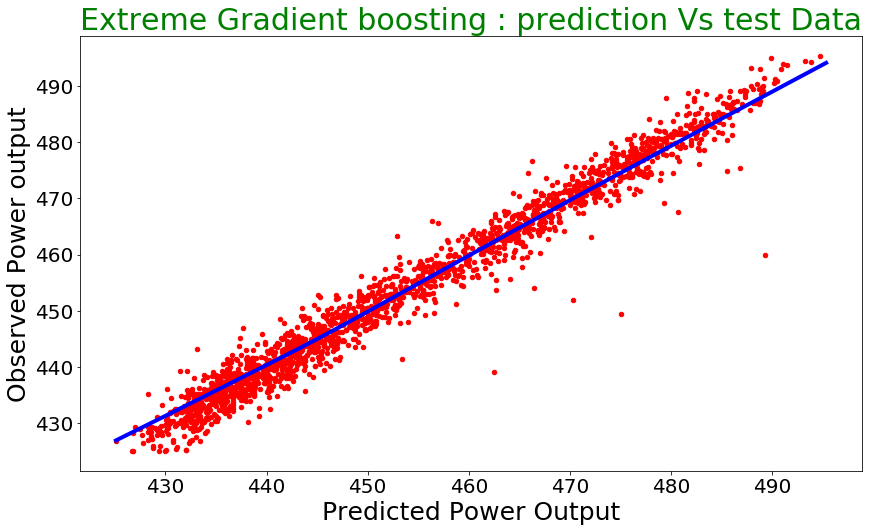

In [57]:
# plot test data
test.plot(figsize=(14,8),
          x='prediction',y='observed',
          kind='scatter',color='r',fontsize=20
         )

plt.title("Extreme Gradient boosting : prediction Vs test Data",fontsize=30,color='g')
plt.xlabel("Predicted Power Output",fontsize=25)
plt.ylabel("Observed Power output",fontsize=25)
plt.plot(z[:,0],z[:,1],color="b",lw=4)
plt.show()

---
# Summary

### We used python to run Extreme Gradient Boosting to predict power output. We see that it has better performance than linear model we tried in Power output with scikit-learn